In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [2]:
url="https://www.flipkart.com/search?q=tablets&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [3]:
req=requests.get(url)
req.status_code

200

In [4]:
headers = {"User-Agent": "Mozilla/5.0",
}

In [5]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

In [6]:
ram_list = []
rom_list = []
processor_list = []
display_list = []
camera_list = []
warranty_list = []
brand, rating_list, num_ratings_list, num_reviews_list = [], [], [], []
product_name=[]
price_list=[]

In [7]:
for page in range(1, 21):
    url = f"https://www.flipkart.com/search?q=tablets&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={page}"
    response = requests.get(url, headers=headers)
    print(f"Page {page} Status Code:", response.status_code)
    print()
    if response.status_code != 200:
        continue 
    soup = BeautifulSoup(response.text, 'html.parser')
    products = soup.find_all("div", class_="_6NESgJ") 
    
    for product in products:
        spec_list = product.find("ul", class_="G4BRas")
        specs = [li.get_text(strip=True) for li in spec_list.find_all("li")] if spec_list else []
        ram = rom = processor = display = camera = warranty = None
        for spec in specs:
            if "RAM" in spec and "GB" in spec:
                ram_rom_parts = spec.split("|")
                for part in ram_rom_parts:
                    if "RAM" in part:
                        ram = part.strip()
                    elif "ROM" in part:
                        rom = part.strip()
            elif "Processor" in spec:
                processor = spec.strip()
            elif "inch" in spec or "cm" in spec:
                display = spec.strip()
            elif "Camera" in spec:
                camera = spec.strip()
            elif "Warranty" in spec:
                warranty = spec.strip()

    
        ram_list.append(ram)
        rom_list.append(rom)
        processor_list.append(processor)
        display_list.append(display)
        camera_list.append(camera)
        warranty_list.append(warranty)




    product_containers = soup.find_all("div", class_="col col-7-12")
    for container in product_containers:
        rating_div = container.find("div", class_="XQDdHH")
        rating = rating_div.get_text(strip=True) if rating_div else None
        rating_list.append(rating)
        
        ratings_reviews_span = container.find("span", class_="Wphh3N")
        num_ratings, num_reviews = None, None
        if ratings_reviews_span:
            rr_text = ratings_reviews_span.get_text(" ", strip=True)  # all text separated by space
            parts = rr_text.split("&")
            if len(parts) == 2:
                num_ratings = parts[0].strip().split()[0]
                num_reviews = parts[1].strip().split()[0]
        num_ratings_list.append(num_ratings)
        num_reviews_list.append(num_reviews)
    prod_name=soup.find_all("div",class_="KzDlHZ")
    product_name=[]
    for i in prod_name:
        product_name.append(i.text)
    for i in product_name:
        ind=i.find(' ')
        brand.append(i[:ind])
    price_tags = soup.find_all("div", class_="Nx9bqj _4b5DiR")
    for tag in price_tags:
        price_list.append(tag.text.strip())
        



   

Page 1 Status Code: 200

Page 2 Status Code: 200

Page 3 Status Code: 200

Page 4 Status Code: 200

Page 5 Status Code: 200

Page 6 Status Code: 200

Page 7 Status Code: 200

Page 8 Status Code: 200

Page 9 Status Code: 200

Page 10 Status Code: 200

Page 11 Status Code: 200

Page 12 Status Code: 200

Page 13 Status Code: 200

Page 14 Status Code: 200

Page 15 Status Code: 200

Page 16 Status Code: 200

Page 17 Status Code: 200

Page 18 Status Code: 200

Page 19 Status Code: 200

Page 20 Status Code: 200



In [8]:
import pandas as pd 

In [9]:
print(len(brand))
print(len( rating_list))
print(len(num_ratings_list))
print(len(num_reviews_list))
print(len(ram_list))
print(len(rom_list))
print(len(display_list))
print(len(processor_list))
print(len(camera_list))
print(len(warranty_list))
print(len(price_list))

480
480
480
480
480
480
480
480
480
480
480


In [13]:
df1 = pd.DataFrame({
    "Brand": brand,
    "Rating": rating_list,
    "NumRatings": num_ratings_list,
    "NumReviews": num_reviews_list,
    "Price":price_list,
    "RAM": ram_list,
    "ROM": rom_list,
    "Display": display_list,
    "Processor": processor_list,
    "Camera": camera_list,
    "Warranty": warranty_list
})

In [14]:
df1

,Brand,Rating,NumRatings,NumReviews,Price,RAM,ROM,Display,Processor,Camera,Warranty
0,OnePlus,4.4,105,10,"₹19,999",6.0 GB RAM,128 GB ROM,27.94 cm (11.0 inch) Display,Processor: MediaTek Helio G100,5 MP Primary Camera | 5 MP Front,1 Year Manufacturer Warranty
1,REDMI,4.4,"11,806",763,"₹12,999",6 GB RAM,128 GB ROM,27.94 cm (11.0 inch) Full HD Display,Processor: Snapdragon 680,8.0 MP Primary Camera | 5 MP Front,1 Year Domestic Warranty
2,Lenovo,4.3,"5,315",361,"₹11,749",4 GB RAM,128 GB ROM,27.94 cm (11.0 inch) Display,Processor: Mediatek Helio G88,13 MP Primary Camera | 8 MP Front,1 Year Comprehensive Warranty
3,realme,4.4,"33,463","2,641","₹28,999",6 GB RAM,128 GB ROM,29.21 cm (11.5 inch) Full HD Display,Processor: Mediatek G99,8 MP Primary Camera | 5 MP Front,1 Year Domestic Warranty
4,OnePlus,4.4,105,10,"₹24,999",8.0 GB RAM,128 GB ROM,27.94 cm (11.0 inch) Display,Processor: MediaTek Helio G100,5 MP Primary Camera | 5 MP Front,1 Year Manufacturer Warranty
...,...,...,...,...,...,...,...,...,...,...,...
475,Apple,4.7,"1,083",48,"₹1,04,900",None,None,27.94 cm (11.0 Inch) Display,Processor: Apple M2 Chip,12 MP Primary Camera | 12 MP Front,Apple One (1) Year Limited Warranty
476,Apple,4.6,"12,007","1,653","₹38,600",None,None,24.64 cm (9.7 inch) Full HD Display,Processor: A9 Chip with 64-bit Architecture wi...,8.0 MP Primary Camera | 1.2 MP Front,None
477,Apple,4.7,"1,083",48,"₹59,900",None,None,27.94 cm (11.0 Inch) Display,Processor: Apple M2 Chip,12 MP Primary Camera | 12 MP Front,Apple One (1) Year Limited Warranty
478,Lenovo,3.8,852,66,"₹13,500",2 GB RAM,32 GB ROM,17.78 cm (7 inches) Display,"Processor: MediaTek MT8765 (4 Cores, 4 x A53 a...",2.0 MP Primary Camera | 2 MP Front,1 Year Warranty


In [117]:
df1.to_csv("TabletsData_EDAPro.csv", index=False)

In [194]:
from IPython.display import FileLink
FileLink("TabletsData_EDAPro.csv")

C:\Users\gurur\TabletsData_EDAPro.csv

In [264]:
df1=pd.read_csv("TabletsData_EDAPro.csv")

In [265]:
df1.isnull().sum()

Brand           0
Rating         33
NumRatings     33
NumReviews     33
Price           0
RAM           141
ROM           141
Display         0
Processor       2
Camera          0
Warranty      118
dtype: int64

In [266]:
df=df1

In [267]:
df_none_ram_rom = df[df['RAM'].isna() & df['ROM'].isna()]
df_none_ram_rom

,Brand,Rating,NumRatings,NumReviews,Price,RAM,ROM,Display,Processor,Camera,Warranty
66,Apple,4.7,"3,491",258,"₹33,900",NaN,NaN,27.94 cm (11.0 inch) Display,A16 chip,12 MP Primary Camera | 12 MP Front,1 Year Brand Warranty
79,Apple,4.6,"17,849",920,"₹34,900",NaN,NaN,27.69 cm (10.9 inch) Full HD Display,A14 Bionic Chip (64-bit Architecture) with Neu...,12 MP Primary Camera | 12 MP Front,1 Year Limited Hardware Warranty
90,Apple,4.7,"3,491",258,"₹49,900",NaN,NaN,27.94 cm (11.0 inch) Display,A16 chip,12 MP Primary Camera | 12 MP Front,1 Year Brand Warranty
91,Apple,4.7,"3,491",258,"₹33,900",NaN,NaN,27.94 cm (11.0 inch) Display,A16 chip,12 MP Primary Camera | 12 MP Front,1 Year Brand Warranty
114,Apple,4.7,"3,491",258,"₹59,900",NaN,NaN,27.94 cm (11.0 inch) Display,A16 chip,12 MP Primary Camera | 12 MP Front,1 Year Brand Warranty
...,...,...,...,...,...,...,...,...,...,...,...
453,Apple,4.6,"13,731","1,162","₹40,900",NaN,NaN,25.91 cm (10.2 inch) Full HD Display,A10 Fusion Chip (64-bit Architecture) with Emb...,8.0 MP Primary Camera | 1.2 MP Front,NaN
471,Apple,4.5,126,7,"₹1,09,900",NaN,NaN,27.94 cm (11.0 inch) Display,Apple M3 Chip,12 MP Primary Camera | 12 MP Front,1 Year Brand Warranty
475,Apple,4.7,"1,083",48,"₹1,04,900",NaN,NaN,27.94 cm (11.0 Inch) Display,Apple M2 Chip,12 MP Primary Camera | 12 MP Front,Apple One (1) Year Limited Warranty
476,Apple,4.6,"12,007","1,653","₹38,600",NaN,NaN,24.64 cm (9.7 inch) Full HD Display,A9 Chip with 64-bit Architecture with Embedded...,8.0 MP Primary Camera | 1.2 MP Front,NaN


In [268]:
df['Processor'] = df['Processor'].str.replace(r'(?i)^processor:\s*', '', regex=True)

In [269]:
df_processor=df[df['Processor'].isna()]

In [270]:
apple_df=df[df['Brand']=='Apple']
apple_proc_mode=apple_df['Processor'].mode()[0]
apple_proc_mode

'Apple M4 Chip'

In [271]:
redmi_df=df[df['Brand']=='REDMI']
redmi_proc_mode=redmi_df['Processor'].mode()[0]
redmi_proc_mode

'Snapdragon 680'

In [272]:
lenovo_df=df[df['Brand']=='Lenovo']
lenovo_proc_mode=lenovo_df['Processor'].mode()[0]
lenovo_proc_mode

'Mediatek Helio G88'

In [273]:
i_df=df[df['Brand']=='I']
i_proc_mode=apple_df['Processor'].mode()[0]
i_proc_mode

'Apple M4 Chip'

In [274]:
iball_df=df[df['Brand']=='iball']
iball_proc_mode=iball_df['Processor'].mode()[0]
iball_proc_mode

'Powerful Quad Core 1.3GHz ARM Cortex A7 Processor'

In [275]:
sam_df=df[df['Brand']=='Samsung']
sam_proc_mode=sam_df['Processor'].mode()[0]
sam_proc_mode

'Exynos 1580'

In [276]:
alcatel_df=df[df['Brand']=='Alcatel']
alcatel_proc_mode=alcatel_df['Processor'].mode()[0]
alcatel_proc_mode

'MediaTek Quad Core (MT8765B)'

In [277]:
brand_names=df['Brand'].unique()
brand_names

array(['OnePlus', 'REDMI', 'Lenovo', 'realme', 'Samsung', 'Tiitan',
       'Baatu', 'I', 'Xiaomi', 'OPPO', 'Apple', 'Infinix', 'Nokia',
       'MOTOROLA', 'Acer', 'DOMO', 'Swipe', 'BrightEureka', 'HUION',
       'Wishtel', 'Huawei', 'Honor', 'iball', 'TCL', 'Elevn', 'Alcatel',
       'HP'], dtype=object)

In [278]:
def fill_processor_with_brand_mode(s):
    if s.isnull().any(): 
        if not s.mode().empty:
            return s.fillna(s.mode()[0])
    return s

df['Processor'] = df.groupby('Brand')['Processor'].transform(fill_processor_with_brand_mode)


In [279]:
df.isnull().sum()

Brand           0
Rating         33
NumRatings     33
NumReviews     33
Price           0
RAM           141
ROM           141
Display         0
Processor       2
Camera          0
Warranty      118
dtype: int64

In [280]:
df = df[df['Processor'].notna()]

In [281]:
df.isnull().sum()

Brand           0
Rating         32
NumRatings     32
NumReviews     32
Price           0
RAM           141
ROM           141
Display         0
Processor       0
Camera          0
Warranty      116
dtype: int64

In [282]:
df_none_ram_rom = df[df['RAM'].isna() & df['ROM'].isna()]
brand_names_RRnone=df_none_ram_rom['Brand'].unique()
brand_names_RRnone

array(['Apple'], dtype=object)

In [283]:
df['Price'] = df['Price'].str.replace('₹', '', regex=False) \
                         .str.replace(',', '', regex=False) \
                         .astype(int)

C:\Users\gurur\AppData\Local\Temp\ipykernel_23148\2393777370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('₹', '', regex=False) \


In [284]:
df

,Brand,Rating,NumRatings,NumReviews,Price,RAM,ROM,Display,Processor,Camera,Warranty
0,OnePlus,4.4,105,10,19999,6.0 GB RAM,128 GB ROM,27.94 cm (11.0 inch) Display,MediaTek Helio G100,5 MP Primary Camera | 5 MP Front,1 Year Manufacturer Warranty
1,REDMI,4.4,"11,806",763,12999,6 GB RAM,128 GB ROM,27.94 cm (11.0 inch) Full HD Display,Snapdragon 680,8.0 MP Primary Camera | 5 MP Front,1 Year Domestic Warranty
2,Lenovo,4.3,"5,315",361,11749,4 GB RAM,128 GB ROM,27.94 cm (11.0 inch) Display,Mediatek Helio G88,13 MP Primary Camera | 8 MP Front,1 Year Comprehensive Warranty
3,realme,4.4,"33,463","2,641",28999,6 GB RAM,128 GB ROM,29.21 cm (11.5 inch) Full HD Display,Mediatek G99,8 MP Primary Camera | 5 MP Front,1 Year Domestic Warranty
4,OnePlus,4.4,105,10,24999,8.0 GB RAM,128 GB ROM,27.94 cm (11.0 inch) Display,MediaTek Helio G100,5 MP Primary Camera | 5 MP Front,1 Year Manufacturer Warranty
...,...,...,...,...,...,...,...,...,...,...,...
475,Apple,4.7,"1,083",48,104900,NaN,NaN,27.94 cm (11.0 Inch) Display,Apple M2 Chip,12 MP Primary Camera | 12 MP Front,Apple One (1) Year Limited Warranty
476,Apple,4.6,"12,007","1,653",38600,NaN,NaN,24.64 cm (9.7 inch) Full HD Display,A9 Chip with 64-bit Architecture with Embedded...,8.0 MP Primary Camera | 1.2 MP Front,NaN
477,Apple,4.7,"1,083",48,59900,NaN,NaN,27.94 cm (11.0 Inch) Display,Apple M2 Chip,12 MP Primary Camera | 12 MP Front,Apple One (1) Year Limited Warranty
478,Lenovo,3.8,852,66,13500,2 GB RAM,32 GB ROM,17.78 cm (7 inches) Display,"MediaTek MT8765 (4 Cores, 4 x A53 at 1.3 GHz)",2.0 MP Primary Camera | 2 MP Front,1 Year Warranty


In [285]:
df.loc[
    (df['Brand'] == 'Apple') &
    (df['Price'] > 40000) &
    (df['ROM'].isna()) &
    (df['RAM'].isna()),
    ['ROM', 'RAM']
] = ['256GB', '8GB']

In [286]:
df.loc[
    (df['Brand'] == 'Apple') &
    (df['Price'] <= 40000) &
    (df['ROM'].isna()) &
    (df['RAM'].isna()),
    ['ROM', 'RAM']
] = ['128GB', '6GB']

In [287]:
df.isnull().sum()

Brand           0
Rating         32
NumRatings     32
NumReviews     32
Price           0
RAM             0
ROM             0
Display         0
Processor       0
Camera          0
Warranty      116
dtype: int64

In [288]:
warranty_mode=df['Warranty'].mode()[0]
df['Warranty']=df['Warranty'].fillna(warranty_mode)

C:\Users\gurur\AppData\Local\Temp\ipykernel_23148\716477406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Warranty']=df['Warranty'].fillna(warranty_mode)


In [289]:
df.isnull().sum()

Brand          0
Rating        32
NumRatings    32
NumReviews    32
Price          0
RAM            0
ROM            0
Display        0
Processor      0
Camera         0
Warranty       0
dtype: int64

In [290]:
df = df.dropna().reset_index(drop=True)

In [291]:
df.isnull().sum()

Brand         0
Rating        0
NumRatings    0
NumReviews    0
Price         0
RAM           0
ROM           0
Display       0
Processor     0
Camera        0
Warranty      0
dtype: int64

In [ ]:
df1.to_csv("TabletsData_EDAPro.csv", index=False)

In [149]:
df.rename(columns={'Rating': 'Rating (Out of 5)'}, inplace=True)

def extract_display_size(value):
    if pd.isnull(value):
        return None
    
    text = str(value).lower()
    
    inch_match = re.search(r'(\d+\.?\d*)\s*inch', text)
    if inch_match:
        return f"{inch_match.group(1)} inch"
    
    cm_match = re.search(r'(\d+\.?\d*)\s*cm', text)
    if cm_match:
        inches = float(cm_match.group(1)) / 2.54
        return f"{round(inches, 1)} inch"  # rounded to 1 decimal
    
    return None

df['Display'] = df['Display'].apply(extract_display_size)




In [150]:
df.head()

,Brand,Rating (Out of 5),NumRatings,NumReviews,Price,RAM,ROM,Display,Processor,Camera,Warranty
0,OnePlus,4.4,105,10,19999,6.0 GB RAM,128 GB ROM,11.0 inch,MediaTek Helio G100,5 MP Primary Camera | 5 MP Front,1 Year Manufacturer Warranty
1,REDMI,4.4,"11,806",763,12999,6 GB RAM,128 GB ROM,11.0 inch,Snapdragon 680,8.0 MP Primary Camera | 5 MP Front,1 Year Domestic Warranty
2,Lenovo,4.3,"5,315",361,11749,4 GB RAM,128 GB ROM,11.0 inch,Mediatek Helio G88,13 MP Primary Camera | 8 MP Front,1 Year Comprehensive Warranty
3,realme,4.4,"33,463","2,641",28999,6 GB RAM,128 GB ROM,11.5 inch,Mediatek G99,8 MP Primary Camera | 5 MP Front,1 Year Domestic Warranty
4,OnePlus,4.4,105,10,24999,8.0 GB RAM,128 GB ROM,11.0 inch,MediaTek Helio G100,5 MP Primary Camera | 5 MP Front,1 Year Manufacturer Warranty


In [154]:
df['NumRatings'] = df['NumRatings'].replace({',': ''}, regex=True).astype(int)
df['NumReviews'] = df['NumReviews'].replace({',': ''}, regex=True).astype(int)

df['Rating (Out of 5)'] = df['Rating (Out of 5)'].astype(float)

In [155]:
def convert_to_gb(value):
    if pd.isna(value):
        return None
    value = str(value).strip().upper()
    match = re.match(r'([\d.]+)\s*(GB|MB|TB)?', value)
    if not match:
        return None
    
    num = float(match.group(1))
    unit = match.group(2)
    
    if unit == 'TB':
        return num * 1024        
    elif unit == 'MB':
        return num / 1024       
    else: 
        return num

df['RAM'] = df['RAM'].apply(convert_to_gb)
df['ROM'] = df['ROM'].apply(convert_to_gb)


In [156]:
df

,Brand,Rating (Out of 5),NumRatings,NumReviews,Price,RAM,ROM,Display,Processor,Camera,Warranty
0,OnePlus,4.4,105,10,19999,6.0,128.0,11.0 inch,MediaTek Helio G100,5 MP Primary Camera | 5 MP Front,1 Year Manufacturer Warranty
1,REDMI,4.4,11806,763,12999,6.0,128.0,11.0 inch,Snapdragon 680,8.0 MP Primary Camera | 5 MP Front,1 Year Domestic Warranty
2,Lenovo,4.3,5315,361,11749,4.0,128.0,11.0 inch,Mediatek Helio G88,13 MP Primary Camera | 8 MP Front,1 Year Comprehensive Warranty
3,realme,4.4,33463,2641,28999,6.0,128.0,11.5 inch,Mediatek G99,8 MP Primary Camera | 5 MP Front,1 Year Domestic Warranty
4,OnePlus,4.4,105,10,24999,8.0,128.0,11.0 inch,MediaTek Helio G100,5 MP Primary Camera | 5 MP Front,1 Year Manufacturer Warranty
...,...,...,...,...,...,...,...,...,...,...,...
441,Apple,4.7,1083,48,104900,8.0,256.0,11.0 inch,Apple M2 Chip,12 MP Primary Camera | 12 MP Front,Apple One (1) Year Limited Warranty
442,Apple,4.6,12007,1653,38600,6.0,128.0,9.7 inch,A9 Chip with 64-bit Architecture with Embedded...,8.0 MP Primary Camera | 1.2 MP Front,Apple One (1) Year Limited Warranty
443,Apple,4.7,1083,48,59900,8.0,256.0,11.0 inch,Apple M2 Chip,12 MP Primary Camera | 12 MP Front,Apple One (1) Year Limited Warranty
444,Lenovo,3.8,852,66,13500,2.0,32.0,7 inch,"MediaTek MT8765 (4 Cores, 4 x A53 at 1.3 GHz)",2.0 MP Primary Camera | 2 MP Front,1 Year Warranty


In [159]:
df.describe().round(2)

,Rating (Out of 5),NumRatings,NumReviews,Price,RAM,ROM
count,446.0,446.00,446.00,446.00,446.00,446.00
mean,4.4,5673.70,408.32,48718.18,6.42,162.71
std,0.3,10137.12,667.11,52918.46,2.47,149.84
min,2.3,3.00,0.00,2999.00,0.50,8.00
25%,4.3,156.00,21.00,14999.00,4.00,128.00
50%,4.5,1613.00,137.50,27245.00,8.00,128.00
75%,4.6,5315.00,403.00,59999.00,8.00,256.00
max,4.8,56232.00,3677.00,259900.00,16.00,2048.00


In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gurur\AppData\Local\Temp\ipykernel_23148\1722219919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='flare')


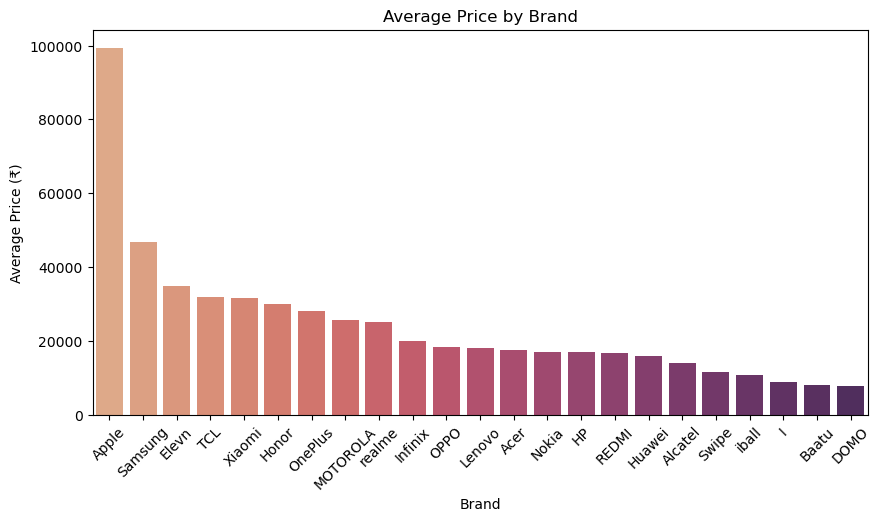

In [175]:
plt.figure(figsize=(10,5))
avg_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values, palette='flare')
plt.title("Average Price by Brand")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=45)
plt.show()

* This bar Chart Shows Average Price of Each brand which makes us helpful to choose brand economically while buying product.
* **Apple** products are by far the most expensive on average, making them a luxury choice.
* **Samsung** also sits in the higher price range, followed by brands like Elvn, TCL, and Xiaomi, which cater to mid-to-high budgets.
* **Honor, Oneplus and Motorola** would be economically best choice for good Quality.
* On the other hand, brands such as **DOMO, Baatu, and iBall** offer very affordable options (under ₹10,000), appealing to price-conscious buyers.

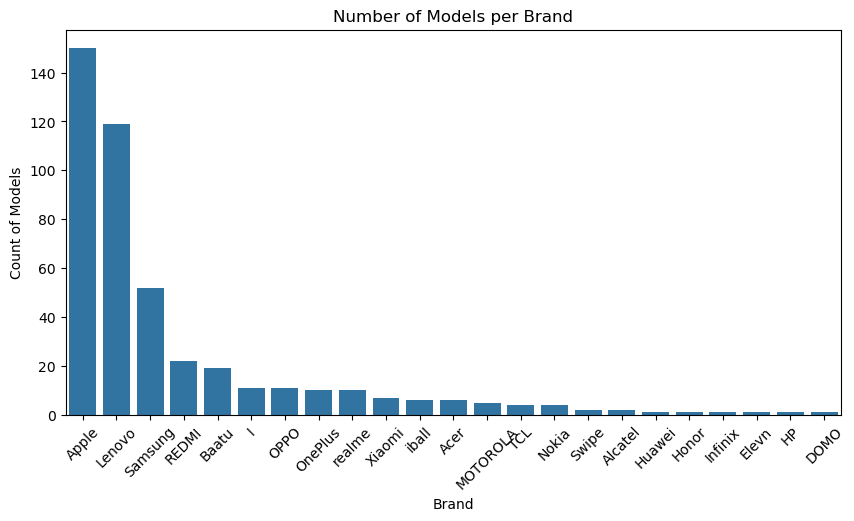

In [168]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Models per Brand")
plt.ylabel("Count of Models")
plt.show()

* From a customer’s perspective, this chart highlights that **Apple** and **Lenovo** lead the market with a significantly larger variety of models, giving buyers a wide range of features, designs, and price points to choose from. 
* **Samsung** follows with a decent selection, while brands like **REDMI** and **Baatu** offer moderate choices.
* Smaller brands such as **Huawei**, **Honor**, and **HP** have very limited options, which might restrict flexibility for customers looking for specific features or budget-friendly alternatives.


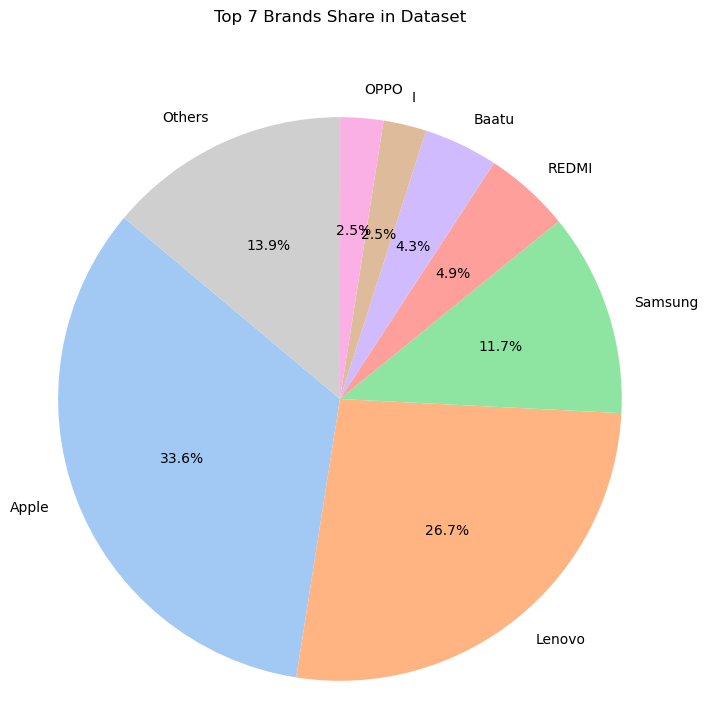

In [259]:
brand_counts = df['Brand'].value_counts()
top_brands = brand_counts[:7]
others = pd.Series({'Others': brand_counts[7:].sum()})
top_brands = pd.concat([top_brands, others])

plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:len(top_brands)]
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Top 7 Brands Share in Dataset",pad=50)
plt.axis('equal')
plt.show()


In [262]:
rating_threshold = 4.5
high_rated = df[df["Rating (Out of 5)"] >= rating_threshold]
top_products = high_rated.sort_values(by=["NumRatings", "NumReviews"], ascending=False)
top_products.head(20)

,Brand,Rating (Out of 5),NumRatings,NumReviews,Price,RAM,ROM,Display,Processor,Camera,Warranty
200,Apple,4.6,56232,3677,32900,6.0,128.0,10.2,A13 Bionic Chip with 64-bit Architecture,8 MP Primary Camera | 12 MP Front,1 Year Warranty
202,Apple,4.6,56232,3677,32900,6.0,128.0,10.2,A13 Bionic Chip with 64-bit Architecture,8 MP Primary Camera | 12 MP Front,1 Year Warranty
203,Apple,4.6,56232,3677,45900,8.0,256.0,10.2,A13 Bionic Chip with 64-bit Architecture,8 MP Primary Camera | 12 MP Front,1 Year Warranty
208,Apple,4.6,56232,3677,47900,8.0,256.0,10.2,A13 Bionic Chip with 64-bit Architecture,8 MP Primary Camera | 12 MP Front,1 Year Warranty
209,Apple,4.6,56232,3677,45900,8.0,256.0,10.2,A13 Bionic Chip with 64-bit Architecture,8 MP Primary Camera | 12 MP Front,1 Year Warranty
210,Apple,4.6,56232,3677,47900,8.0,256.0,10.2,A13 Bionic Chip with 64-bit Architecture,8 MP Primary Camera | 12 MP Front,1 Year Warranty
213,Apple,4.6,56232,3677,60900,8.0,256.0,10.2,A13 Bionic Chip with 64-bit Architecture,8 MP Primary Camera | 12 MP Front,1 Year Warranty
219,Apple,4.6,56232,3677,60900,8.0,256.0,10.2,A13 Bionic Chip with 64-bit Architecture,8 MP Primary Camera | 12 MP Front,1 Year Warranty
372,Apple,4.7,33177,3015,38600,6.0,128.0,9.7,A10 Fusion Chip with 64-bit Architecture with ...,8.0 MP Primary Camera | 1.2 MP Front,Apple One (1) Year Limited Warranty
15,Samsung,4.5,31778,1196,18460,8.0,128.0,11.0,Snapdragon 695,8 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty


In [263]:
Top20Products = top_20_products.sort_values(by="ROM", ascending=False)
Toprecommendations=Top20Products.sort_values(by="Price",ascending=True)
Toprecommendations.head(10)

,Brand,Rating (Out of 5),NumRatings,NumReviews,Price,RAM,ROM,Display,Processor,Camera,Warranty
45,Samsung,4.5,31778,1196,14999,4.0,64.0,11.0 inch,QUALCOMM SM6375,8.0 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty
21,Samsung,4.5,31778,1196,16999,8.0,128.0,11.0 inch,QUALCOMM SM6375,8 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty
23,Samsung,4.5,31778,1196,17570,8.0,128.0,11.0 inch,QUALCOMM SM6375,8 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty
17,Samsung,4.5,31778,1196,17999,8.0,128.0,11.0 inch,Snapdragon 695,8.0 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty
15,Samsung,4.5,31778,1196,18460,8.0,128.0,11.0 inch,Snapdragon 695,8 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty
64,Samsung,4.5,31778,1196,18890,8.0,128.0,11.0 inch,QUALCOMM SM6375,8 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty
132,Samsung,4.5,31778,1196,18999,4.0,64.0,11.0 inch,QUALCOMM SM6375,8.0 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty
440,Samsung,4.5,31778,1196,18999,4.0,64.0,11.0 inch,QUALCOMM SM6375,8.0 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty
56,Samsung,4.5,31778,1196,21947,4.0,64.0,11.0 inch,Snapdragon 695,8 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty
80,Samsung,4.5,31778,1196,22999,4.0,64.0,11.0 inch,Snapdragon 695,8.0 MP Primary Camera | 5 MP Front,Apple One (1) Year Limited Warranty


C:\Users\gurur\AppData\Local\Temp\ipykernel_23148\1827746677.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


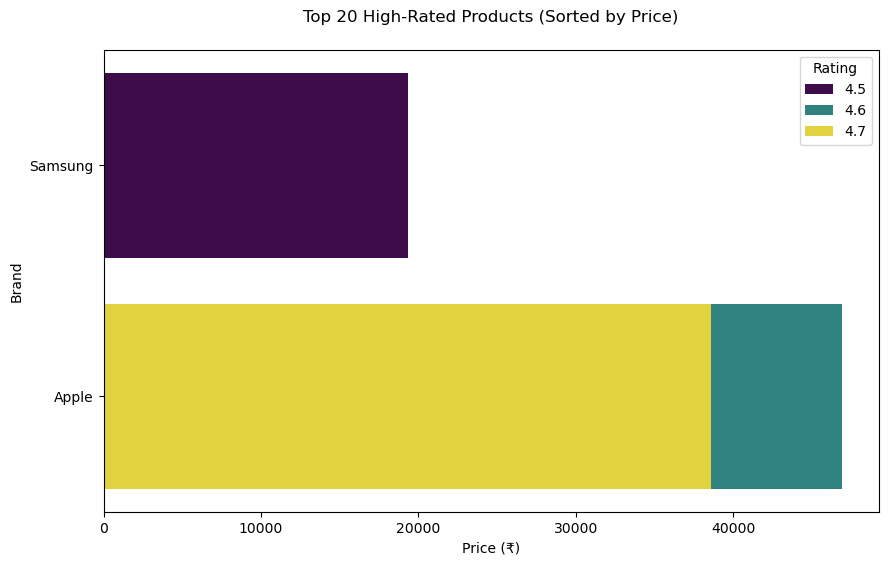

In [198]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=Toprecommendations,
    x="Price",
    y="Brand",
    hue="Rating (Out of 5)",
    dodge=False,
    palette="viridis",ci=None
    
)

plt.title("Top 20 High-Rated Products (Sorted by Price)", pad=20)
plt.xlabel("Price (₹)")
plt.ylabel("Brand")
plt.legend(title="Rating")
plt.show()


* **Samsung** offers highly rated products (4.5 stars) at a much lower price range around ₹19,000, making them attractive for buyers who want good quality without breaking the bank.
* **Apple** also scores high in customer ratings (4.6–4.7 stars) but sits in the ₹39,000–₹47,000 range, clearly targeting premium buyers willing to pay for brand prestige, design, and ecosystem benefits.
* For budget-conscious customers, Samsung looks like the best value-for-money choice good rating, affordable price.
* For those seeking top-end performance, brand reputation, and premium build, Apple remains the go-to, albeit at a much higher price.

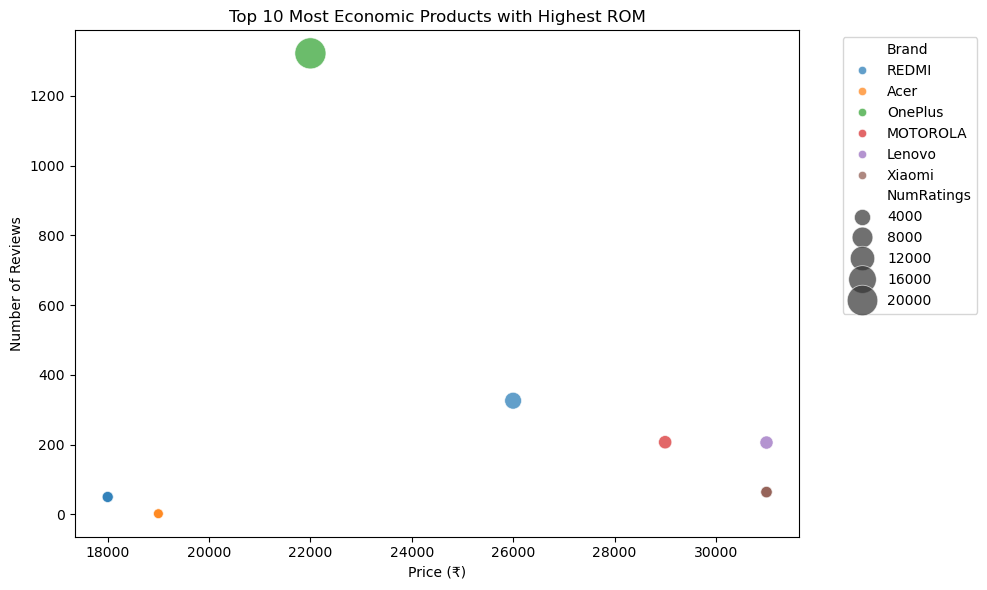

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rom_threshold = df["ROM"].quantile(0.9)  # Top 10% ROM
highest_rom_products = df[df["ROM"] >= rom_threshold]

top10_highest_rom = highest_rom_products.sort_values(by="Price", ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top10_highest_rom,
    x="Price",
    y="NumReviews",
    hue="Brand",
    size="NumRatings",
    sizes=(50, 500),  # Bubble size by rating
    alpha=0.7
)

plt.title(f"Top 10 Most Economic Products with Highest ROM")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Reviews")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


* **OnePlus**,Highest ROM,[₹22K], and the most reviews (high trust).
* **REDMI**[₹26K] Good storage, decent reviews, and competitive price.
* **MOTOROLA**[₹29K] – Solid storage, reasonable reviews, and brand reliability.
* If you want cheapest option, **Acer** or **REDMI** at ₹18K–₹19K is worth a look, but they’re less reviewed.

In [213]:
top10_highest_rom

,Brand,Rating (Out of 5),NumRatings,NumReviews,Price,RAM,ROM,Display,Processor,Camera,Warranty
24,REDMI,4.4,621,50,17999,8.0,256.0,11.0 inch,Snapdragon 680,8 Megapixels MP Primary Camera | 5 MP Front,1 Year Brand Warranty
38,REDMI,4.4,621,50,17999,8.0,256.0,11.0 inch,Snapdragon 680,8 Megapixels MP Primary Camera | 5 MP Front,1 Year Brand Warranty
148,Acer,4.7,23,2,18999,8.0,256.0,10.36 inch,MediaTek Helio G99,16 MP Primary Camera | 8 MP Front,1 Year Carry-in Warranty
127,Acer,4.7,23,2,18999,8.0,256.0,10.36 inch,MediaTek Helio G99,16 MP Primary Camera | 8 MP Front,1 Year Carry-in Warranty
16,OnePlus,4.5,20770,1322,21999,8.0,256.0,11.35 inch,Mediatek Helio G99,8.0 MP Primary Camera | 8 MP Front,1 Year Manufacturer Warranty
34,REDMI,4.4,4481,326,25999,8.0,256.0,12.1 inch,Snapdragon 7s Gen 2,8.0 MP Primary Camera | 8 MP Front,1 Year Domestic Warranty
130,MOTOROLA,4.5,1941,207,28999,12.0,256.0,12.7 inch,MediaTek Dimensity 8300,13 MP Primary Camera | 8 MP Front,1 Year Comprehensive Warranty
176,Lenovo,4.4,1864,206,30999,8.0,256.0,12.7 inch,MediaTek Dimensity 7050,13 MP Primary Camera | 8 MP Front,1 Year Warranty on Tablet including Battery
46,Xiaomi,4.5,846,64,30999,12.0,256.0,11.17 inch,Snapdragon 7+ Gen 3,13.0 MP Primary Camera | 8 MP Front,1 Year Brand Warranty
55,Xiaomi,4.5,846,64,30999,12.0,256.0,11.17 inch,Snapdragon 7+ Gen 3,13.0 MP Primary Camera | 8 MP Front,1 Year Brand Warranty


In [224]:
df['Display'] = df['Display'].astype(str).str.replace(' inch', '', regex=False)
df['Display']=df['Display'].astype(float)
df['Display'].dtype

dtype('float64')

In [231]:
display_threshold = df["Display"].quantile(0.85)
big_display_low_price = df[df["Display"] >= display_threshold]
Top_Displaysize = big_display_low_price.sort_values(
    by=["Price", "Display"], 
    ascending=[True, False]).head(15)

Top_Displaysize

,Brand,Rating (Out of 5),NumRatings,NumReviews,Price,RAM,ROM,Display,Processor,Camera,Warranty
133,Lenovo,4.4,1864,206,20999,8.0,128.0,12.7,MediaTek Dimensity 7050,13 MP Primary Camera | 8 MP Front,1 Year Comprehensive Warranty
325,Lenovo,4.4,1864,206,20999,8.0,128.0,12.7,MediaTek Dimensity 7050,13 MP Primary Camera | 8 MP Front,1 Year Comprehensive Warranty
12,REDMI,4.4,967,76,20999,6.0,128.0,12.1,Snapdragon 7s Gen 2,8.0 MP Primary Camera | 8 MP Front,1 Year Domestic Warranty
51,REDMI,4.4,967,76,20999,6.0,128.0,12.1,Snapdragon 7s Gen 2,8.0 MP Primary Camera | 8 MP Front,1 Year Domestic Warranty
20,REDMI,4.4,4481,326,23999,8.0,128.0,12.1,Snapdragon 7s Gen 2,8.0 MP Primary Camera | 8 MP Front,1 Year Domestic Warranty
70,REDMI,4.4,4481,326,23999,8.0,128.0,12.1,Snapdragon 7s Gen 2,8.0 MP Primary Camera | 8 MP Front,1 Year Domestic Warranty
34,REDMI,4.4,4481,326,25999,8.0,256.0,12.1,Snapdragon 7s Gen 2,8.0 MP Primary Camera | 8 MP Front,1 Year Domestic Warranty
130,MOTOROLA,4.5,1941,207,28999,12.0,256.0,12.7,MediaTek Dimensity 8300,13 MP Primary Camera | 8 MP Front,1 Year Comprehensive Warranty
129,Lenovo,4.4,1864,206,30999,8.0,256.0,12.7,MediaTek Dimensity 7050,13 MP Primary Camera | 8 MP Front,1 Year Warranty on Tablet including Battery
176,Lenovo,4.4,1864,206,30999,8.0,256.0,12.7,MediaTek Dimensity 7050,13 MP Primary Camera | 8 MP Front,1 Year Warranty on Tablet including Battery


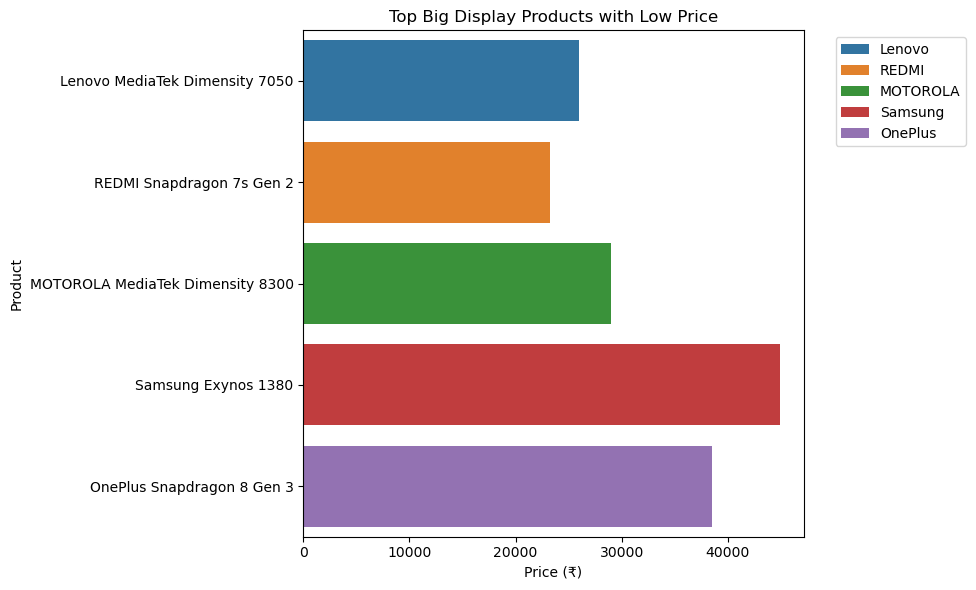

In [239]:
Top_Displaysize['Product'] = Top_Displaysize['Brand'] + " " + Top_Displaysize['Processor']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=Top_Displaysize,
    x="Price",
    y="Product", 
    hue="Brand",
    dodge=False,
    errorbar=None
)
plt.title("Top Big Display Products with Low Price")
plt.xlabel("Price (₹)")
plt.ylabel("Product")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




* **Lowest price** options: **REDMI Snapdragon 7s Gen 2** and **Lenovo MediaTek Dimensity 7050** — great for budget buyers.
* **Mid-range price**: **MOTOROLA MediaTek Dimensity 8300** and **OnePlus Snapdragon 8 Gen 3** — balanced performance and price.
* **Highest price**: **Samsung Exynos 1380** — still a big display option but with a higher cost.




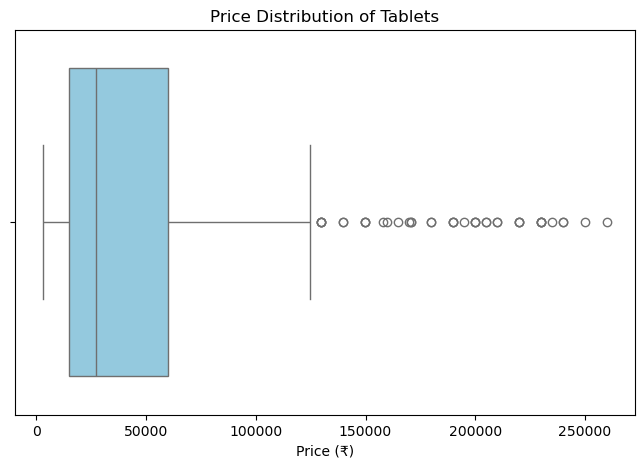

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'], color='skyblue')
plt.title('Price Distribution of Tablets')
plt.xlabel('Price (₹)')
plt.show()


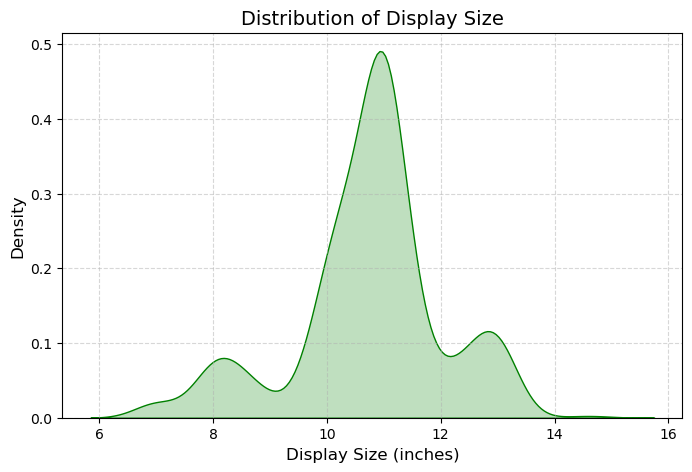

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot for Display size
plt.figure(figsize=(8,5))
sns.kdeplot(df['Display'], fill=True, color='green')
plt.title('Distribution of Display Size', fontsize=14)
plt.xlabel('Display Size (inches)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\gurur\AppData\Local\Temp\ipykernel_23148\3475326622.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


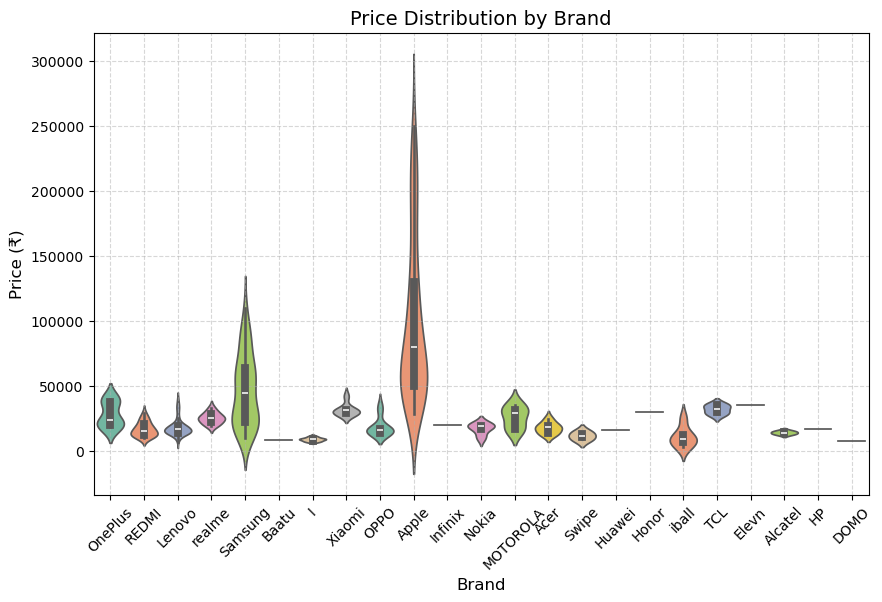

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot: Brand vs Price
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df,
    x='Brand',
    y='Price',
    palette='Set2'
)
plt.title('Price Distribution by Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


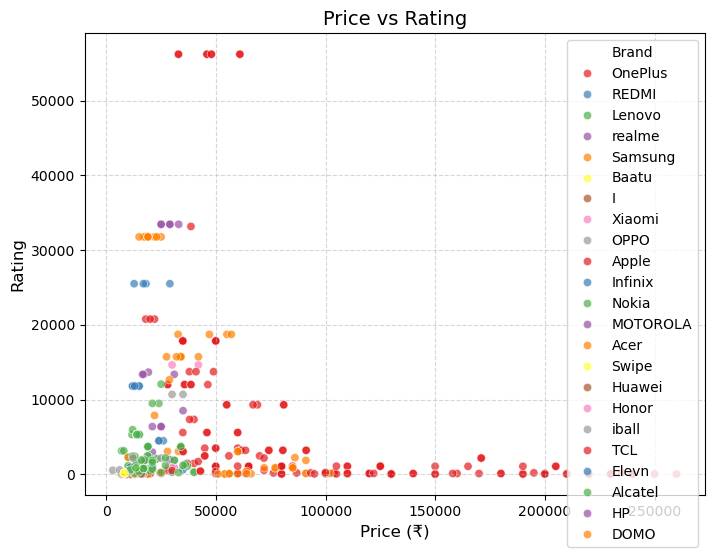

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Price vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Price',
    y='NumRatings',
    hue='Brand',   # Optional: color by brand
    palette='Set1',
    alpha=0.7
)
plt.title('Price vs Rating', fontsize=14)
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


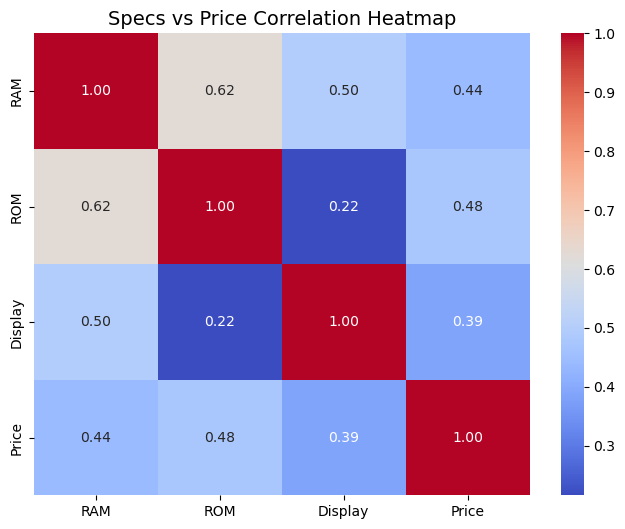

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant columns for correlation
specs = df[['RAM', 'ROM', 'Display', 'Price']]

# If RAM/ROM are strings like '4 GB', convert them to numeric
#specs['RAM'] = specs['RAM'].str.replace('GB', '', case=False).astype(float)
#specs['ROM'] = specs['ROM'].str.replace('GB', '', case=False).astype(float)
#specs['Display'] = specs['Display'].str.replace('"', '', case=False).astype(float)

# Correlation matrix
corr_matrix = specs.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True
)
plt.title('Specs vs Price Correlation Heatmap', fontsize=14)
plt.show()
